In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/BIGDATA/melb_data.csv'  # Ganti dengan path yang sesuai di Drive Anda
df = pd.read_csv(file_path)

##IMPORT DATASET

In [ ]:
# Menampilkan lima baris pertama dari dataset untuk melihat struktur data
print(df.head())

       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

In [ ]:
# Melihat statistik deskriptif dari dataset
print(df.describe())

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241   

In [ ]:
df.head(100)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Albert Park,4a Gatehouse La,3,h,1370000.0,S,Greg,12/06/2016,3.3,3206.0,...,2.0,2.0,0.0,85.0,2000.0,Port Phillip,-37.8451,144.9511,Southern Metropolitan,3280.0
96,Albert Park,60 Brooke St,2,h,1000000.0,S,Cayzer,12/11/2016,3.3,3206.0,...,1.0,0.0,288.0,NaN,NaN,Port Phillip,-37.8407,144.9523,Southern Metropolitan,3280.0
97,Albert Park,70 Barrett St,3,h,2575000.0,S,Greg,15/10/2016,3.3,3206.0,...,2.0,1.0,228.0,NaN,NaN,Port Phillip,-37.8445,144.9501,Southern Metropolitan,3280.0
98,Albert Park,65 Graham St,2,h,1322500.0,S,Greg,15/10/2016,3.3,3206.0,...,1.0,0.0,149.0,98.0,1890.0,Port Phillip,-37.8443,144.9481,Southern Metropolitan,3280.0


##MEMPERSIAPKAN DATASET

In [ ]:
# Melihat Jumlah Baris Dan Column Dataset
df.shape

(13580, 21)

In [ ]:
# Melihat tipe data tiap kolom dari dataset
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
# Melihat data kolom apakah ada yang terdapat data kosong (NA) dan menghitung serta membersihkan data NULL
df.isna()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
13576,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
13577,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
13578,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
# Melihat Jumlah Data Yang Kosong Atau NA
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
# menampilkan jumlah baris apakah ada yang ke duplikat
df.duplicated().sum()

0

In [ ]:
#Delete Missing Value
df = df.dropna()

In [ ]:
df.shape

(6196, 21)

In [ ]:
df.head

<bound method NDFrame.head of              Suburb          Address  Rooms Type      Price Method  \
1        Abbotsford  25 Bloomburg St      2    h  1035000.0      S   
2        Abbotsford     5 Charles St      3    h  1465000.0     SP   
4        Abbotsford      55a Park St      4    h  1600000.0     VB   
6        Abbotsford     124 Yarra St      3    h  1876000.0      S   
7        Abbotsford    98 Charles St      2    h  1636000.0      S   
...             ...              ...    ...  ...        ...    ...   
12205    Whittlesea    30 Sherwin St      3    h   601000.0      S   
12206  Williamstown      75 Cecil St      3    h  1050000.0     VB   
12207  Williamstown    2/29 Dover Rd      1    u   385000.0     SP   
12209       Windsor  201/152 Peel St      2    u   560000.0     PI   
12212    Yarraville  54 Pentland Pde      6    h  2450000.0     VB   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
1             Biggin   4/02/2016       2.5    3067.0 

In [ ]:
# Melihat Jumlah Data Yang Kosong Atau NA
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [ ]:
# Menghilangkan kolom yang tidak di gunakan
df.drop(columns=['Suburb','Postcode','Method','Date','Lattitude','Longtitude', 'SellerG', 'Address', 'CouncilArea', ],inplace=True)

##EDA(Exploratory Data Analytics)

In [ ]:
#Print DataFrame
df

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
1,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.00,1900.0,Northern Metropolitan,4019.0
2,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.00,1900.0,Northern Metropolitan,4019.0
4,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,142.00,2014.0,Northern Metropolitan,4019.0
6,3,h,1876000.0,2.5,4.0,2.0,0.0,245.0,210.00,1910.0,Northern Metropolitan,4019.0
7,2,h,1636000.0,2.5,2.0,1.0,2.0,256.0,107.00,1890.0,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12205,3,h,601000.0,35.5,3.0,2.0,1.0,972.0,149.00,1996.0,Northern Victoria,2170.0
12206,3,h,1050000.0,6.8,3.0,1.0,0.0,179.0,115.00,1890.0,Western Metropolitan,6380.0
12207,1,u,385000.0,6.8,1.0,1.0,1.0,0.0,35.64,1967.0,Western Metropolitan,6380.0
12209,2,u,560000.0,4.6,2.0,1.0,1.0,0.0,61.60,2012.0,Southern Metropolitan,4380.0


In [ ]:
# Melihat 10 Data Teratas
df.head(10)

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
1,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0
2,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0
4,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0
6,3,h,1876000.0,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,Northern Metropolitan,4019.0
7,2,h,1636000.0,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,Northern Metropolitan,4019.0
9,2,h,1097000.0,2.5,3.0,1.0,2.0,220.0,75.0,1900.0,Northern Metropolitan,4019.0
11,3,h,1350000.0,2.5,3.0,2.0,2.0,214.0,190.0,2005.0,Northern Metropolitan,4019.0
12,2,u,750000.0,2.5,2.0,2.0,1.0,0.0,94.0,2009.0,Northern Metropolitan,4019.0
15,2,h,1310000.0,2.5,2.0,1.0,2.0,238.0,97.0,1890.0,Northern Metropolitan,4019.0
16,3,h,1200000.0,2.5,3.0,2.0,1.0,113.0,110.0,1880.0,Northern Metropolitan,4019.0


In [ ]:
# Melihat 10 Data Terakhir
df.tail(10)

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
12197,4,h,645000.0,14.7,4.0,2.0,2.0,555.0,237.00,2002.0,Western Metropolitan,16166.0
12198,4,h,482500.0,14.7,4.0,2.0,0.0,533.0,170.00,1980.0,Western Metropolitan,16166.0
12199,3,u,394000.0,14.7,3.0,2.0,4.0,287.0,137.00,2013.0,Western Metropolitan,16166.0
12202,4,h,821000.0,16.5,4.0,3.0,2.0,544.0,264.00,1997.0,Northern Metropolitan,2474.0
12203,3,h,635000.0,16.5,3.0,2.0,1.0,691.0,177.00,1975.0,Northern Metropolitan,2474.0
12205,3,h,601000.0,35.5,3.0,2.0,1.0,972.0,149.00,1996.0,Northern Victoria,2170.0
12206,3,h,1050000.0,6.8,3.0,1.0,0.0,179.0,115.00,1890.0,Western Metropolitan,6380.0
12207,1,u,385000.0,6.8,1.0,1.0,1.0,0.0,35.64,1967.0,Western Metropolitan,6380.0
12209,2,u,560000.0,4.6,2.0,1.0,1.0,0.0,61.60,2012.0,Southern Metropolitan,4380.0
12212,6,h,2450000.0,6.3,6.0,3.0,2.0,1087.0,388.50,1920.0,Western Metropolitan,6543.0


In [ ]:
# Melihat Nama-nama Column Dari Dataset
df.columns

Index(['Rooms', 'Type', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
 # Melihat Informasi column dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          6196 non-null   int64  
 1   Type           6196 non-null   object 
 2   Price          6196 non-null   float64
 3   Distance       6196 non-null   float64
 4   Bedroom2       6196 non-null   float64
 5   Bathroom       6196 non-null   float64
 6   Car            6196 non-null   float64
 7   Landsize       6196 non-null   float64
 8   BuildingArea   6196 non-null   float64
 9   YearBuilt      6196 non-null   float64
 10  Regionname     6196 non-null   object 
 11  Propertycount  6196 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 629.3+ KB


In [ ]:
# Mengubah Tipe Data Beberapa Kolom
df['Price'] = df['Price'].astype(int);
df['Landsize'] = df['Landsize'].astype(int);
df['Distance'] = df['Distance'].astype(int);
df['Bedroom2'] = df['Bedroom2'].astype(int);
df['Bathroom'] = df['Bathroom'].astype(int);
df['Car'] = df['Car'].astype(int);
df['BuildingArea'] = df['BuildingArea'].astype(int);
df['YearBuilt'] = df['YearBuilt'].astype(int);
df['Propertycount'] = df['Propertycount'].astype(int);

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df ['Type'] = encoder.fit_transform(df['Type'])
df ['Type'].value_counts()

0    4088
2    1506
1     602
Name: Type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df ['Regionname'] = encoder.fit_transform(df['Regionname'])
df ['Regionname'].value_counts()

5    2166
2    1854
6    1392
0     571
4     157
1      23
3      19
7      14
Name: Regionname, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Rooms          6196 non-null   int64
 1   Type           6196 non-null   int64
 2   Price          6196 non-null   int64
 3   Distance       6196 non-null   int64
 4   Bedroom2       6196 non-null   int64
 5   Bathroom       6196 non-null   int64
 6   Car            6196 non-null   int64
 7   Landsize       6196 non-null   int64
 8   BuildingArea   6196 non-null   int64
 9   YearBuilt      6196 non-null   int64
 10  Regionname     6196 non-null   int64
 11  Propertycount  6196 non-null   int64
dtypes: int64(12)
memory usage: 629.3 KB


In [ ]:
# Melihat deskripsi dari dataset
df.describe()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
count,6196.000000,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,0.583280,1.068828e+06,9.299709,2.902034,1.576340,1.573596,471.006940,141.556972,1964.081988,3.824403,7435.489509
std,0.971079,0.853992,6.751564e+05,5.618953,0.970055,0.711362,0.929947,897.449881,90.835408,38.105673,1.986514,4337.698917
min,1.000000,0.000000,1.310000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,0.000000,389.000000
25%,2.000000,0.000000,6.200000e+05,5.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,2.000000,4383.750000
50%,3.000000,0.000000,8.800000e+05,9.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,5.000000,6567.000000
75%,4.000000,1.000000,1.325000e+06,12.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,5.000000,10175.000000
max,8.000000,2.000000,9.000000e+06,47.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,7.000000,21650.000000


In [ ]:
# Menghapus Baris Data Yang Nilai Kolom Harganya 0
df = df[df['Price'] > 0].sort_values('Price')
df.reset_index(drop=True,inplace=True)
df.shape

(6196, 12)

In [ ]:
# Melihat Korelasi Setiap Variabel
df.corr()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
Rooms,1.000000,-0.584355,0.533505,0.282326,0.951793,0.613853,0.422526,0.098755,0.608206,-0.068122,0.008734,-0.111422
Type,-0.584355,1.000000,-0.436262,-0.226298,-0.572275,-0.279236,-0.279881,-0.046484,-0.396593,0.337642,0.050107,0.105385
Price,0.533505,-0.436262,1.000000,-0.147397,0.514561,0.503922,0.261507,0.081419,0.530600,-0.304633,0.090677,-0.046410
Distance,0.282326,-0.226298,-0.147397,1.000000,0.288652,0.123606,0.274284,0.059352,0.159115,0.245411,-0.072219,-0.082243
Bedroom2,0.951793,-0.572275,0.514561,0.288652,1.000000,0.617751,0.425726,0.097172,0.592988,-0.056343,0.000705,-0.109401
Bathroom,0.613853,-0.279236,0.503922,0.123606,0.617751,1.000000,0.340808,0.076295,0.534427,0.157820,0.048440,-0.067126
Car,0.422526,-0.279881,0.261507,0.274284,0.425726,0.340808,1.000000,0.117647,0.334242,0.108714,0.015210,-0.046487
Landsize,0.098755,-0.046484,0.081419,0.059352,0.097172,0.076295,0.117647,1.000000,0.084794,0.026518,-0.001794,-0.017784
BuildingArea,0.608206,-0.396593,0.530600,0.159115,0.592988,0.534427,0.334242,0.084794,1.000000,0.005809,0.040654,-0.066133
YearBuilt,-0.068122,0.337642,-0.304633,0.245411,-0.056343,0.157820,0.108714,0.026518,0.005809,1.000000,-0.019518,-0.000797


In [ ]:
df.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
0,4,0,131000,8,4,1,2,499,155,1920,5,2379
1,4,0,145000,7,3,1,1,536,164,1910,2,11204
2,1,2,170000,5,1,1,0,30,26,2013,6,7570
3,1,2,185000,13,1,1,1,2347,43,1975,6,2185
4,1,2,200000,7,1,1,1,0,38,1960,6,1808


##VISUALISASI DATA

In [ ]:
# informasi tahun dari kolom 'YearBuilt'
df['YearBuilt'] = df['YearBuilt'].astype(str).str[:4]

# Kelompokkan data berdasarkan tahun dan hitung rata-rata harga rumah untuk setiap tahun
average_price_per_year = df.groupby('YearBuilt')['Price'].mean().reset_index()

In [ ]:
average_price_per_year = df.groupby('YearBuilt')['Price'].mean()
average_price_per_year = average_price_per_year.reset_index()

In [ ]:
average_price_per_year

,YearBuilt,Price
0,1196,1.200000e+06
1,1830,8.550000e+05
2,1850,1.347000e+06
3,1854,3.310000e+06
4,1856,2.260000e+06
...,...,...
130,2014,9.307866e+05
131,2015,1.248310e+06
132,2016,1.523330e+06
133,2017,8.267500e+05


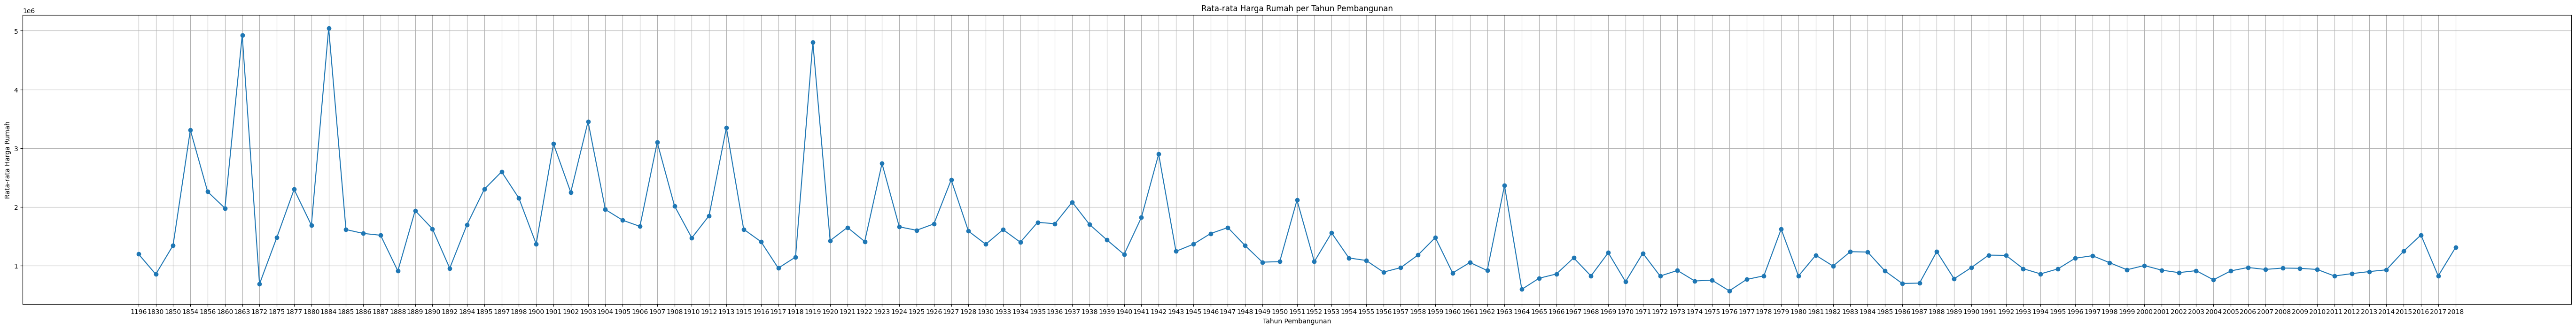

In [ ]:
# visualisasi data price dan YearBuilt dengan line plot
plt.figure(figsize=(70, 8))
plt.plot(average_price_per_year['YearBuilt'], average_price_per_year['Price'], marker='o')
plt.xlabel('Tahun Pembangunan')
plt.ylabel('Rata-rata Harga Rumah')
plt.title('Rata-rata Harga Rumah per Tahun Pembangunan')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Grafik Histogram Kolom Rooms')

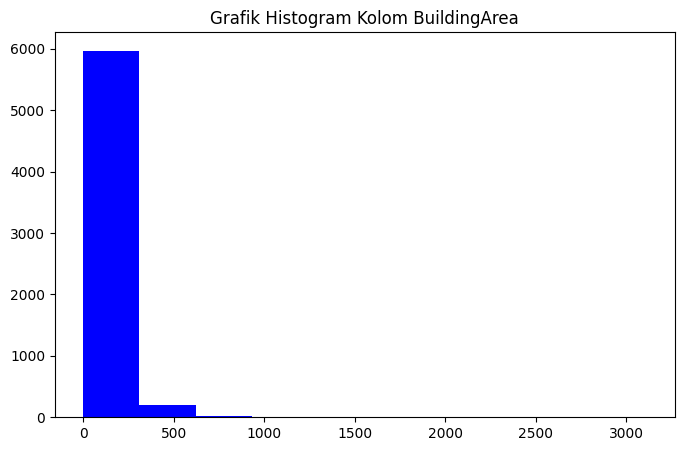

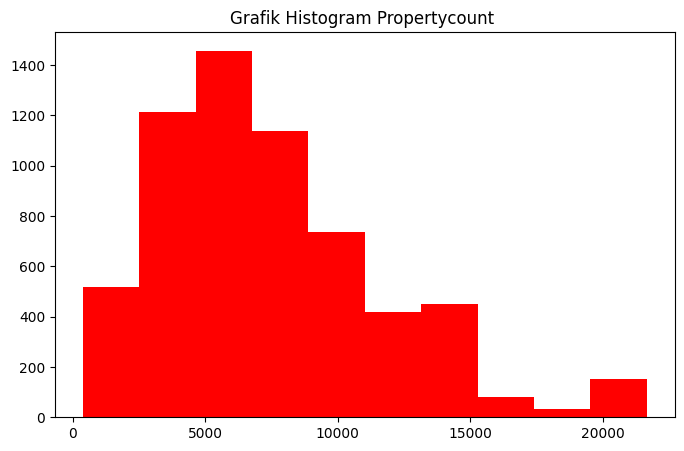

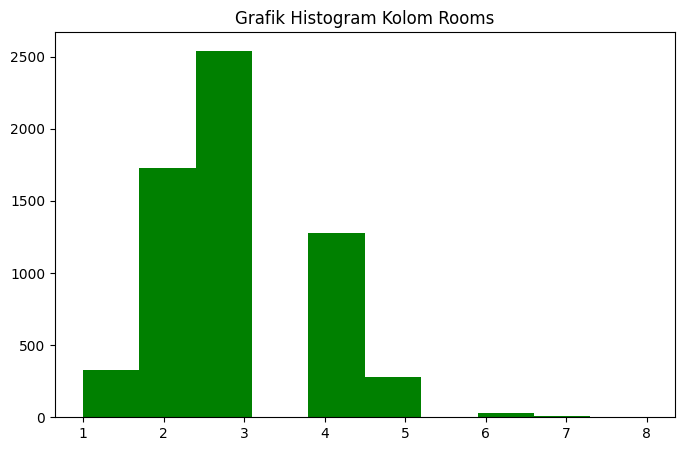

In [ ]:
# Visualisasi Data Kolom BuildingArea Dengan Histogram
df.hist(column='BuildingArea',grid=False, figsize=(8,5),zorder=2,color="b")
plt.title("Grafik Histogram Kolom BuildingArea")
# Visualisasi Data Kolom Propertycount Dengan Histogram
df.hist(column='Propertycount',grid=False, figsize=(8,5),zorder=2,color="r")
plt.title("Grafik Histogram Propertycount ")
# Visualisasi Data Kolom Rooms Dengan Histogram
df.hist(column='Rooms',grid=False, figsize=(8,5),zorder=2,color="g")
plt.title("Grafik Histogram Kolom Rooms")

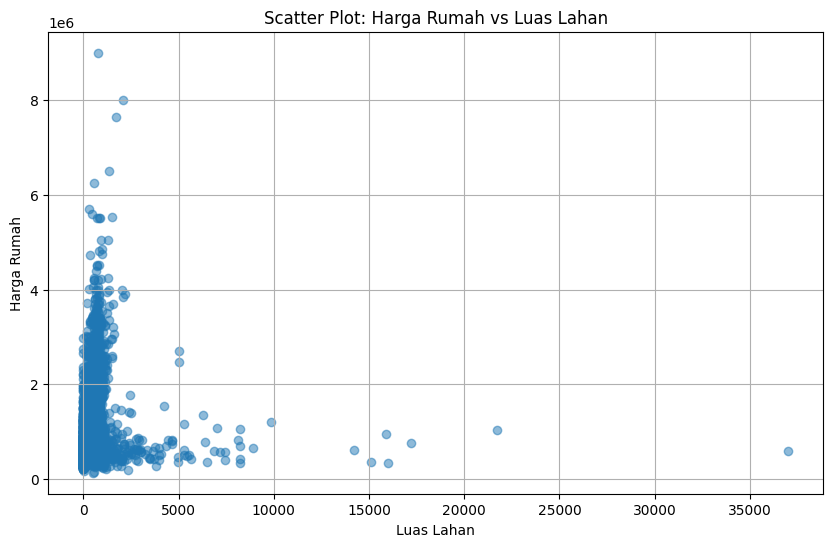

In [ ]:
# visualisasi data price dan Landsize menggunakan scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Landsize'], df['Price'], alpha=0.5)
plt.xlabel('Luas Lahan')
plt.ylabel('Harga Rumah')
plt.title('Scatter Plot: Harga Rumah vs Luas Lahan')
plt.grid(True)
plt.show()

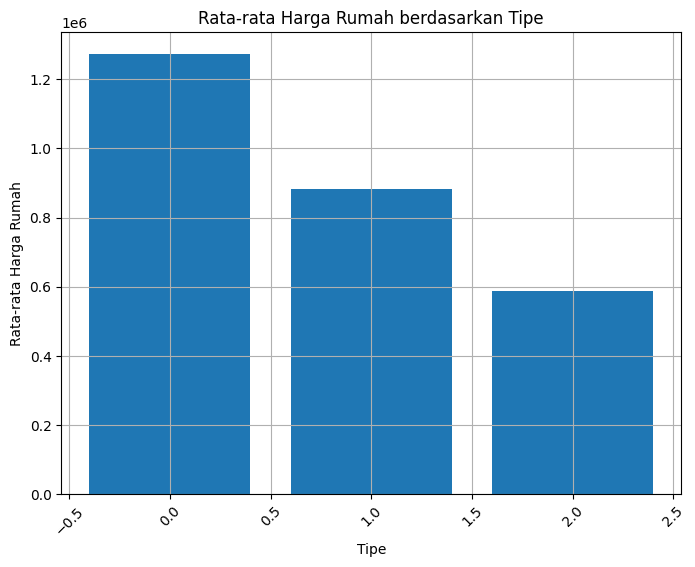

In [ ]:
 # visualisasi data price dan Type menggunakan bar plot
average_price_by_type = df.groupby('Type')['Price'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(average_price_by_type['Type'], average_price_by_type['Price'])
plt.xlabel('Tipe')
plt.ylabel('Rata-rata Harga Rumah')
plt.title('Rata-rata Harga Rumah berdasarkan Tipe')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

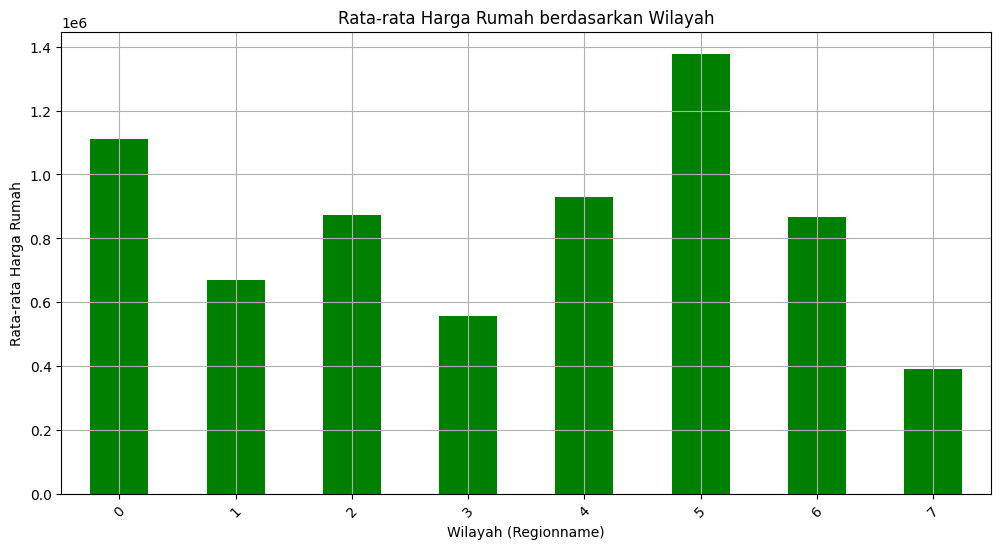

In [ ]:
# visualisasi data price dan Regionname menggunakan barplot
plt.figure(figsize=(12, 6))
df.groupby('Regionname')['Price'].mean().plot(kind='bar', color='green')
plt.xlabel('Wilayah (Regionname)')
plt.ylabel('Rata-rata Harga Rumah')
plt.title('Rata-rata Harga Rumah berdasarkan Wilayah')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

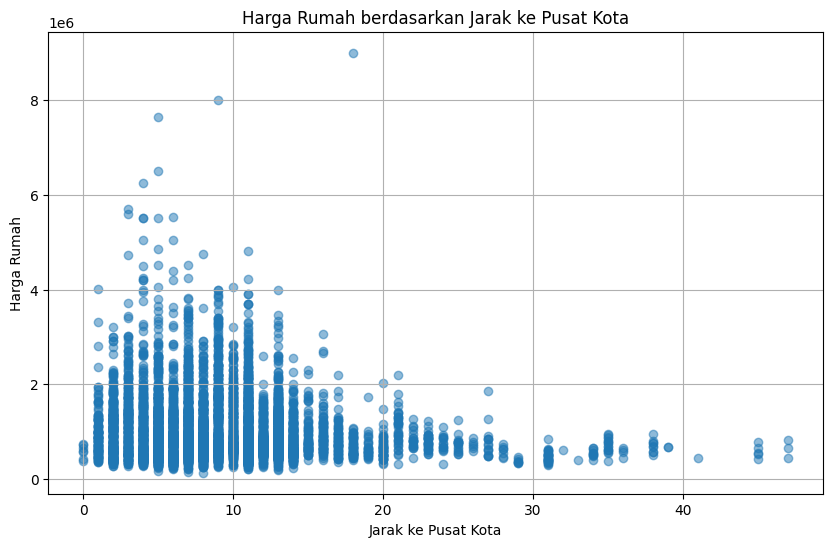

In [ ]:
# visualisasi data price dan distance menggunakan scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Distance'], df['Price'], alpha=0.5)
plt.xlabel('Jarak ke Pusat Kota')
plt.ylabel('Harga Rumah')
plt.title('Harga Rumah berdasarkan Jarak ke Pusat Kota')
plt.grid(True)
plt.show()

##KORELASI

In [ ]:
#Melihat korelasi seluruh variabel
df.corr()

<ipython-input-134-770b56bb6b71>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Regionname,Propertycount
Rooms,1.000000,-0.584355,0.533505,0.282326,0.951793,0.613853,0.422526,0.098755,0.608206,0.008734,-0.111422
Type,-0.584355,1.000000,-0.436262,-0.226298,-0.572275,-0.279236,-0.279881,-0.046484,-0.396593,0.050107,0.105385
Price,0.533505,-0.436262,1.000000,-0.147397,0.514561,0.503922,0.261507,0.081419,0.530600,0.090677,-0.046410
Distance,0.282326,-0.226298,-0.147397,1.000000,0.288652,0.123606,0.274284,0.059352,0.159115,-0.072219,-0.082243
Bedroom2,0.951793,-0.572275,0.514561,0.288652,1.000000,0.617751,0.425726,0.097172,0.592988,0.000705,-0.109401
Bathroom,0.613853,-0.279236,0.503922,0.123606,0.617751,1.000000,0.340808,0.076295,0.534427,0.048440,-0.067126
Car,0.422526,-0.279881,0.261507,0.274284,0.425726,0.340808,1.000000,0.117647,0.334242,0.015210,-0.046487
Landsize,0.098755,-0.046484,0.081419,0.059352,0.097172,0.076295,0.117647,1.000000,0.084794,-0.001794,-0.017784
BuildingArea,0.608206,-0.396593,0.530600,0.159115,0.592988,0.534427,0.334242,0.084794,1.000000,0.040654,-0.066133
Regionname,0.008734,0.050107,0.090677,-0.072219,0.000705,0.048440,0.015210,-0.001794,0.040654,1.000000,-0.154572


<ipython-input-135-06e22b28747b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = df.corr()


<Axes: title={'center': 'Memvisualisasikan Korelasi Antar Variabel Menggunakan Heatmap'}>

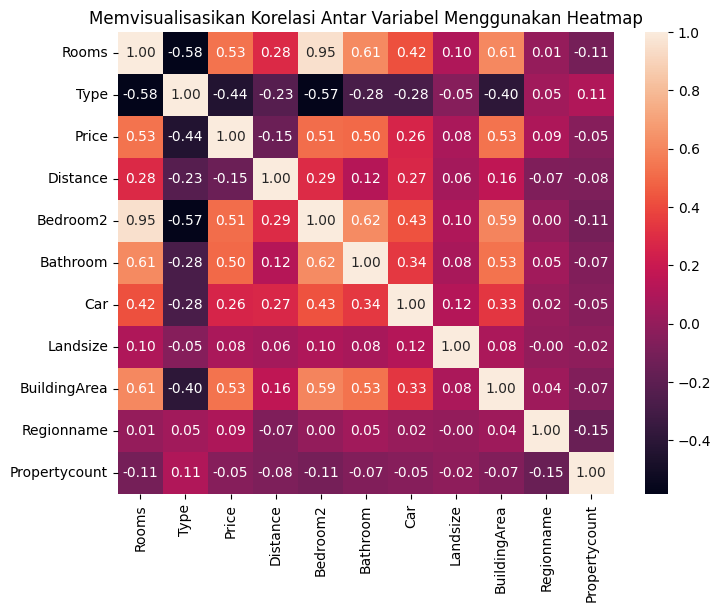

In [ ]:
# Memvisualisasikan Korelasi Semua Variabel Dengan Heatmap
plt.figure(figsize=(8,6))
korelasi = df.corr()
plt.title("Memvisualisasikan Korelasi Antar Variabel Menggunakan Heatmap")
sns.heatmap(korelasi,annot=True,fmt='.2f')

<Axes: >

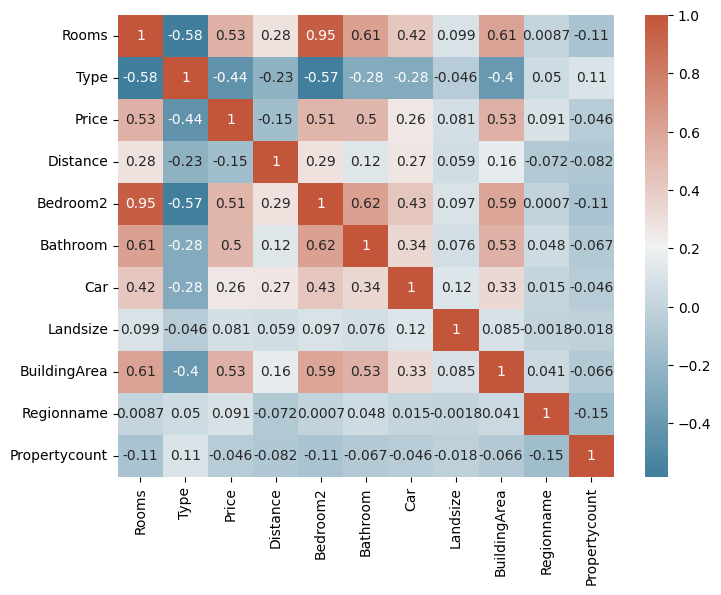

In [ ]:
plt.subplots(figsize=(8,6))
color = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(korelasi, annot=True, cmap=color)

<Axes: >

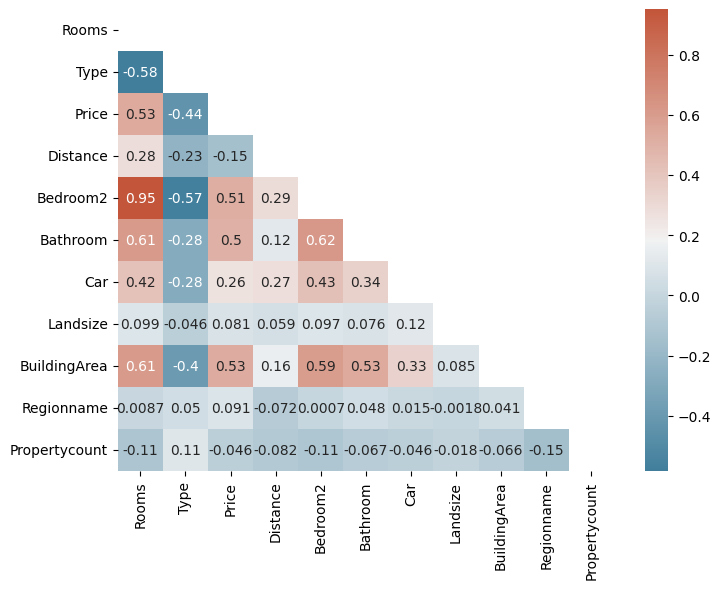

In [ ]:
plt.subplots(figsize=(8,6))
mask = np.triu(np.ones_like(korelasi, dtype=bool))
color = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(korelasi, annot=True, cmap=color, mask=mask)

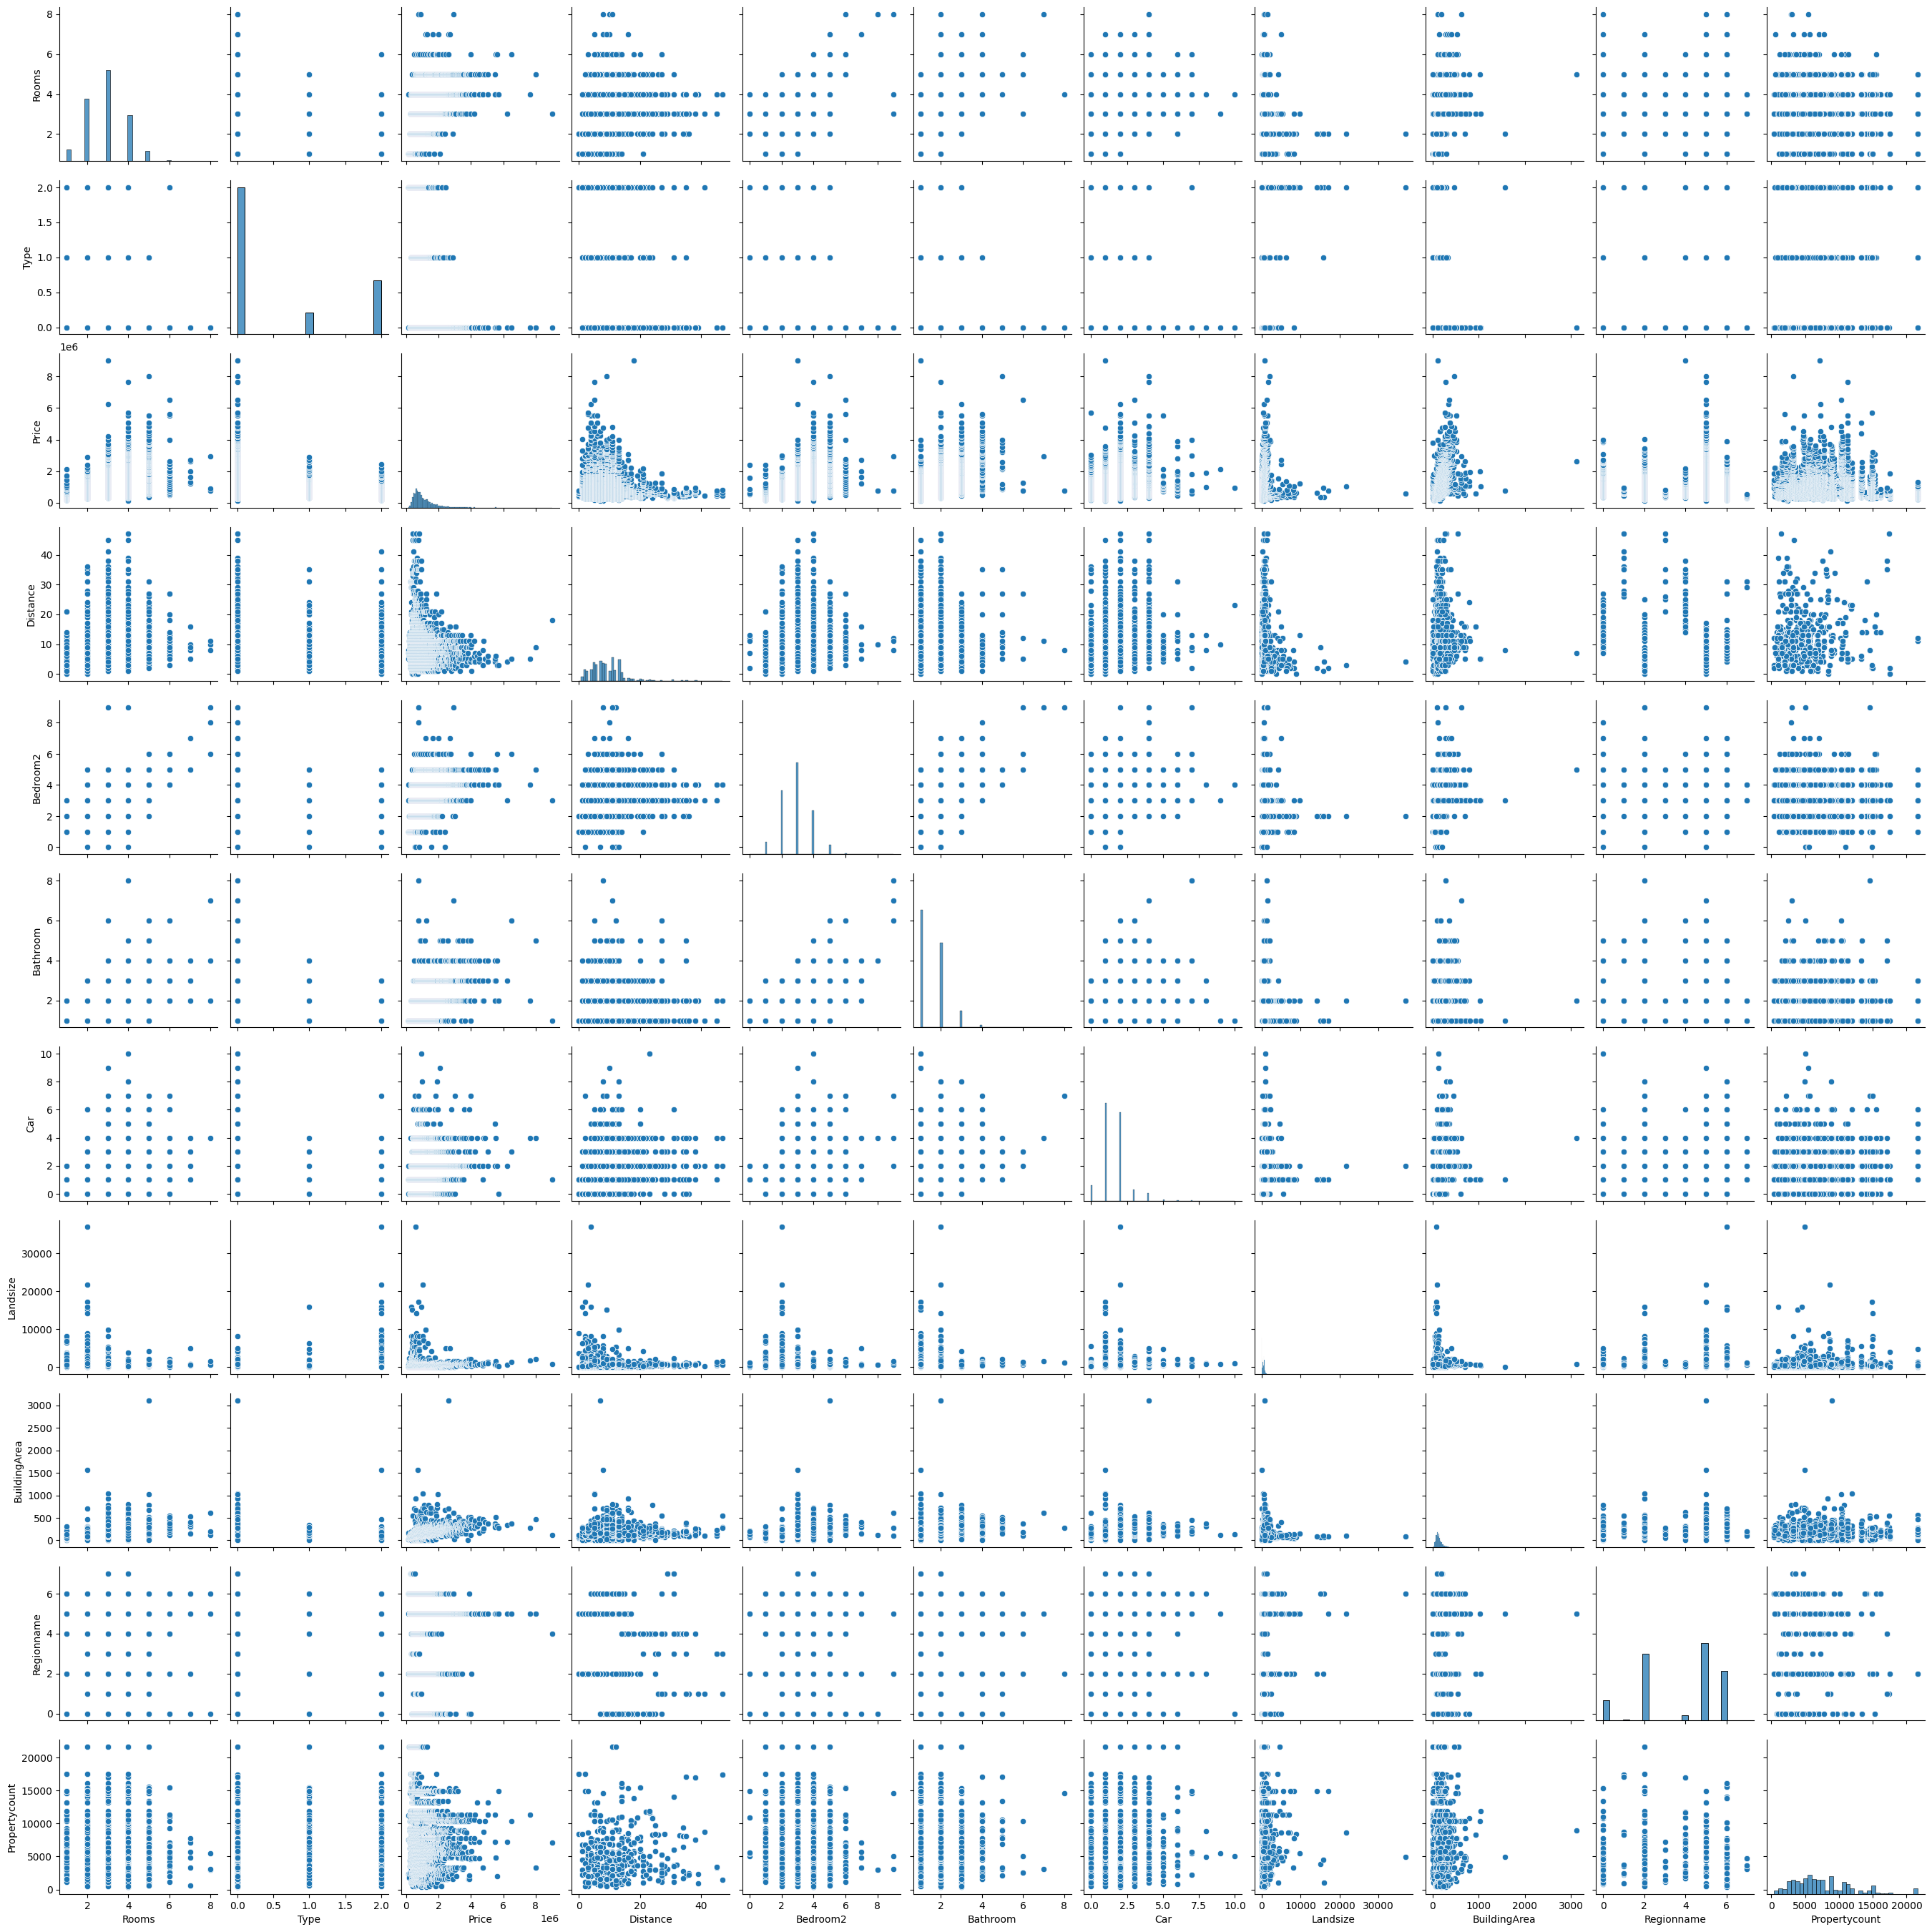

In [ ]:
sns.pairplot(df)

# REGRESI LINEAR

In [ ]:
## Membagi var independen x dan y
X = df[["Rooms","Bedroom2","Bathroom","BuildingArea",]]
y = df["Price"]
print(X.shape)
print(y.shape)

(6196, 4)
(6196,)


###Split Data dengan perbandingan train dan testing 70 : 30

In [ ]:
#Membagi data menjadi data train dan data test dengan perbandingan 70 : 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

In [ ]:
# Melihat Jumlah Data Train Dan Test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4337, 4)
(4337,)
(1859, 4)
(1859,)


In [ ]:
# membuat model regresi
regr = LinearRegression()
regr.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [ ]:
# mendapatkan nilai coef & intercept
print('Intercept: ', regr.intercept_)
print('Coef: ', regr.coef_)

Intercept:  -45394.46285709459
Coef:  [203574.99668087 -31773.97352668 231644.56072021   1773.9431131 ]


In [ ]:
# Menampilkan hasil prediksi
pred = regr.predict(X_test)
print(pred)
print(y_test)

[ 678863.36567219 1714593.19501134 1592933.10730354 ... 2101041.33485105
  641610.56029702  886143.25108845]
624      460000
2478     770000
6022    2725000
4408    1250000
4162    1170000
         ...   
5308    1663000
2788     825000
5424    1750000
742      486000
2843     835000
Name: Price, Length: 1859, dtype: int64


In [ ]:
pred = regr.predict(X_test)

# Evaluasi RMSE
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 493620.3054246279


In [ ]:
# Persamaan
# Y = 203574.99668087*Rooms -31773.97352668*Bedroom2 + 231644.56072021*Bathroom + 1773.9431131*BuildingArea - 45394.46285709459

###Pembanding dengan 2 variabel






In [ ]:
# Membagi var independen ("Rooms","Bedroom2") dan
# variabel dependent (y) tetap price
X2 = df[["Rooms","Bedroom2"]]
y2 = df["Price"]
print(X2.shape)
print(y2.shape)

(6196, 2)
(6196,)


In [ ]:
#Data tetap dibagi menjadi data train dan data test dengan perbandingan 70 : 30
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=70)

In [ ]:
# Melihat Jumlah Data Train Dan Test
print (X2_train.shape)
print(y_train.shape)
print(X2_test.shape)
print(y_test.shape)

(4337, 2)
(4337,)
(1859, 2)
(1859,)


In [ ]:
# Membuat Model Linear Regresi
regr2 = LinearRegression()
regr2.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
# mendapatkan nilai coef & intercept
print('Intercept: ', regr2.intercept_)
print('Coef: ', regr2.coef_)

Intercept:  -52367.31528609595
Coef:  [328604.59375495  56703.50505114]


In [ ]:
# Menampilkan hasil prediksi
pred = regr2.predict(X2_test)
print(pred)
print(y2_test)

[ 718248.88232609 1488865.07993828 1488865.07993828 ... 1874173.17874437
  718248.88232609 1103556.98113218]
624      460000
2478     770000
6022    2725000
4408    1250000
4162    1170000
         ...   
5308    1663000
2788     825000
5424    1750000
742      486000
2843     835000
Name: Price, Length: 1859, dtype: int64


In [ ]:
pred = regr2.predict(X2_test)

# Evaluasi RMSE
rmse2 = np.sqrt(metrics.mean_squared_error(np.array(y2_test), pred))

In [ ]:
print(f"Root Mean Squared Error: {rmse2}")

Root Mean Squared Error: 529398.1344385133


In [ ]:
# persamaan
# Y = 328604.59375495*Rooms + 56703.50505114*Bedrooms - 52367.31528609595

###Split Data dengan perbandingan train dan testing 60 : 40

In [ ]:
# membagi data dependent dan independent
X = df[["Rooms","Bedroom2","Bathroom","BuildingArea",]]
y = df["Price"]
print(X.shape)
print(y.shape)

(6196, 4)
(6196,)


In [ ]:
#Membagi data menjadi data train dan data test dengan perbandingan 60 : 40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=60)

In [ ]:
# Melihat Jumlah Data Train Dan Test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3717, 4)
(3717,)
(2479, 4)
(2479,)


In [ ]:
# Membuat Model regresi
regr = LinearRegression()
regr.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [ ]:
# mendapatkan nilai coef & intercept
print('Intercept: ', regr.intercept_)
print('Coef: ', regr.coef_)

Intercept:  -23998.423603328178
Coef:  [194993.60850674 -37319.72809047 225618.53669124   1909.07210279]


In [ ]:
# Menampilkan hasil prediksi
pred = regr.predict(X_test)
print(pred)
print(y_test)

[1407294.36625465  458565.74284922 1489384.46667459 ... 1812713.7091702
  983235.36519541  671602.71424638]
5681    1998000
803      500000
5387    1715000
1663     640000
706      480000
         ...   
3299     916000
4485    1271000
6178    4525000
1293     585000
3267     910000
Name: Price, Length: 2479, dtype: int64


In [ ]:
pred = regr.predict(X_test)
rmse3 = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [ ]:
# Evaluasi RMSE
print(f"Root Mean Squared Error: {rmse3}")

Root Mean Squared Error: 533632.3827059369


In [ ]:
# Persamaan
# Y = 194993.60850674*Rooms -37319.72809047*Bedroom2 + 225618.53669124*Bathroom + 1909.07210279*BuildingArea - 23998.423603328178

###Pembanding dengan 2 variabel

In [ ]:
# Membagi var independen ("Rooms","Bedroom2") dan
# variabel dependent (y) tetap price
X2 = df[["Rooms","Bedroom2"]]
y2 = df["Price"]
print(X2.shape)
print(y2.shape)

(6196, 2)
(6196,)


In [ ]:
#Data tetap dibagi menjadi data train dan data test dengan perbandingan 60 : 40
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=60)

In [ ]:
# Melihat Jumlah Data Train Dan Test
print(X2_train.shape)
print(y_train.shape)
print(X2_test.shape)
print(y_test.shape)

(3717, 2)
(3717,)
(2479, 2)
(2479,)


In [ ]:
# membuat model regresi
regr2 = LinearRegression()
regr2.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
# Menampilkan nilai coef & intercept
print('Coef :', regr2.coef_)
print('Intercept :', regr2.intercept_)

Coef : [331234.18889283  37735.86267541]
Intercept : -14483.818214349914


In [ ]:
# melihat nilai prediksi
pred2 = regr2.predict(X2_test)
print(pred2)
print(y2_test)

[1461396.38805864  354486.2333539  1461396.38805864 ... 1461396.38805864
  979218.74846415  723456.28492214]
5681    1998000
803      500000
5387    1715000
1663     640000
706      480000
         ...   
3299     916000
4485    1271000
6178    4525000
1293     585000
3267     910000
Name: Price, Length: 2479, dtype: int64


In [ ]:
# Evaluasi RMSE
mse2 = metrics.mean_squared_error(np.array(y2_test),
pred2)
rmse4 = np.sqrt(mse2)
print(f"Root Mean Squared Error: {rmse4}")

Root Mean Squared Error: 566750.5595364713


In [ ]:
# persamaan
# Y = 331234.18889283*Rooms + 37735.86267541*Bedrooms - 14483.818214349914

## Hasil perbandingan

In [ ]:
print('Perbandingan menggunakan semua variabel bebas variabel dengan 2 variabel')
print("4 Variabel , split 70:30 = ",rmse);
print("2 variabel , split 70:30 = ",rmse2);
print("4 variabel , split 60:40 = ",rmse3);
print("2 variabel , split 60:40 = ",rmse4);

Perbandingan menggunakan semua variabel bebas variabel dengan 2 variabel
4 Variabel , split 70:30 =  493620.3054246279
2 variabel , split 70:30 =  529398.1344385133
4 variabel , split 60:40 =  533632.3827059369
2 variabel , split 60:40 =  566750.5595364713
